# Finite differences with custom and tested code

In [1]:
import numpy as np
from scipy import constants
import matplotlib.pyplot as plt

from finite_differences import build_diff_from_node_to_cell

Planck's Law:

$$ B(\nu, T) = \frac{ 2 h \nu^3}{c^2} \frac 1{\exp\left(\frac{h\nu}{k_\mathrm B T}\right) - 1} $$

In [100]:
def plancks_law(frequency, temperature):
    """
    Electromagnetic radiation power per unit area of a black body
    
    Parameters
    ----------
    frequency : float or array
        Electromagnetic spectrum frequency in Hz.
    temperature : float or array
        Temperature of the black body in Kelvin.
    
    Returns
    -------
    radiation_power_per_area : float or array
        Emissive radiation power per unit area of the black body at the
        given frequency and temperature.
    """
    result = 2 * constants.h * frequency ** 3 / constants.c ** 2
    result /= np.exp(
        constants.h * frequency / constants.Boltzmann / temperature
    ) - 1
    return result

Define a array of frequencies (this will be the nodes of the mesh)

In [112]:
frequencies = np.linspace(0.1, 1e14, 1001)

Plot the Planck's Law curve for different temperatures

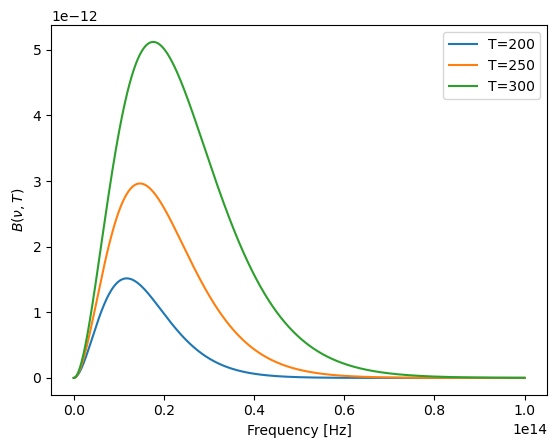

In [128]:
temperatures = (200, 250, 300)

for temp in temperatures:
    plt.plot(
        frequencies, plancks_law(frequencies, temp), label=f"T={temp}"
    )
plt.xlabel("Frequency [Hz]")
plt.ylabel(r"$B(\nu, T)$")
plt.legend()
plt.show()

Evaluate the curve on the mesh (frequencies array) at 0C (273K)

In [127]:
temperature = 273
emission_power = plancks_law(frequencies, temperature)

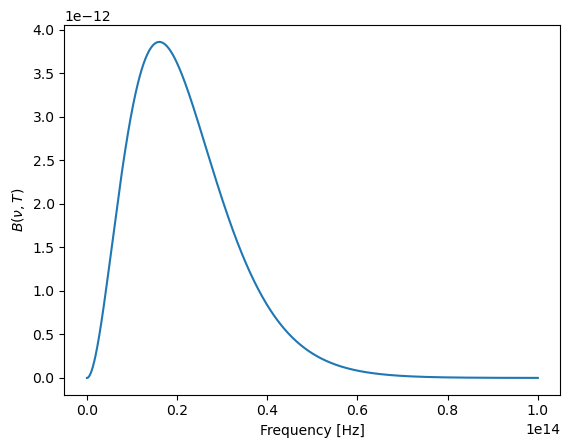

In [129]:
plt.plot(frequencies, emission_power)
plt.xlabel("Frequency [Hz]")
plt.ylabel(r"$B(\nu, T)$")
plt.show()

Compute the derivative of the curve on the center of the mesh cells

In [120]:
# Get the spacing between the frequencies
delta_freq = frequencies[1] - frequencies[0]

# Build the differentiation sparse matrix
diff_matrix = build_diff_from_node_to_cell(delta_freq, frequencies.size)

# Compute the derivative
diff_power = diff_matrix @ emission_power

Plot the derivative

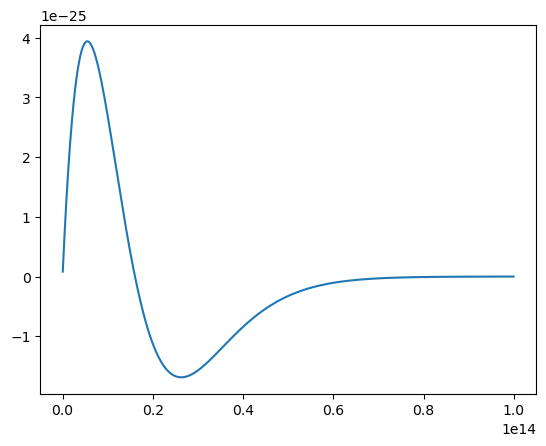

In [131]:
# Get the location of the cell centers
cell_centers = (frequencies[1:] + frequencies[:-1]) / 2

plt.plot(cell_centers, diff_power)
plt.show()